#  NLP Project




# Introduction
In the realm of Natural Language Processing (NLP), sentiment analysis stands as a crucial task, enabling the extraction of subjective information from text data. This project focuses on classifying tweets based on the emotions they express, such as joy, sadness, fear, and anger. By leveraging a dataset labeled with these emotions, we aim to train and compare various machine learning models to accurately predict the primary sentiment of each tweet. The dataset is divided into training and testing sets, with a validation set provided at the end to ensure the model's generalizability and to avoid overfitting.

The significance of this project lies in its practical applications across numerous fields, including **customer feedback analysis, social media monitoring, and public opinion tracking. By analyzing sentiment, organizations can gain insights into user opinions, enhance customer experiences, and make informed decisions.**

# Objectives
The primary objectives of this project are:

Train and Evaluate Various Models:
- Fully Connected Neural Network: Implement and train a feed-forward neural network to classify tweet emotions.
- Recurrent Neural Network (RNN): Utilize LSTM or GRU-based RNNs to capture sequential dependencies in tweet texts for sentiment classification.
- Transformer Architecture: Fine-tune a pre-trained transformer model (We are using BERT based model in our project) using the HuggingFace library to leverage advanced contextual understanding for emotion detection.

### Data Loading and EDA

In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving test.txt to test (1).txt
Saving train.txt to train (1).txt


In [ ]:
import pandas as pd
import os

# Define the file loading function
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if ';' in line:
                tweet, label = line.strip().split(';')
                data.append({'text': tweet, 'emotion': label})
    return pd.DataFrame(data)

# Load datasets using the uploaded file names
train_file_path = 'train.txt'
test_file_path = 'test.txt'

train_data = load_data(train_file_path)
test_data = load_data(test_file_path)

# Display the first few rows of the datasets
print(train_data.head())
print(test_data.head())


                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
                                                text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


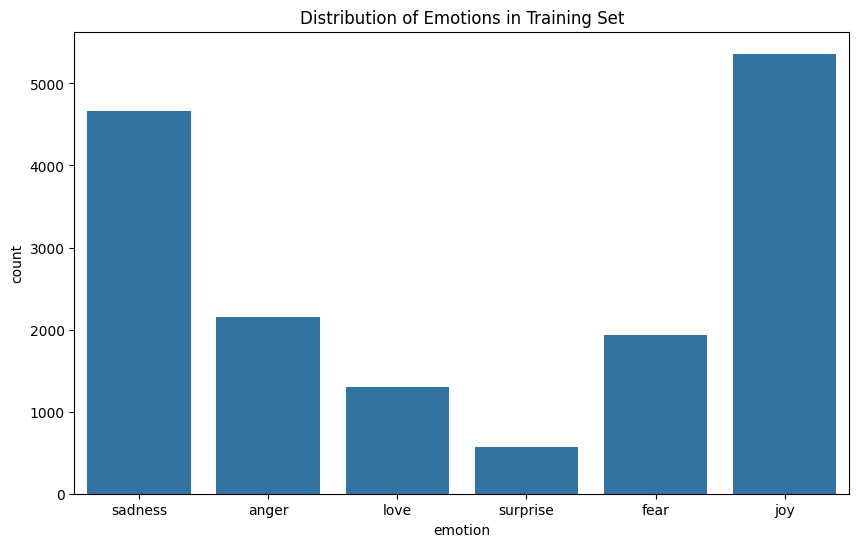

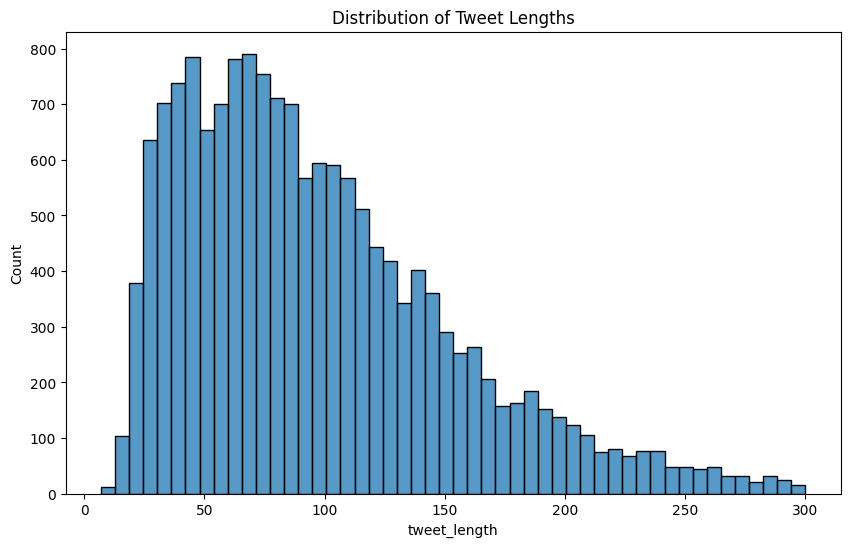

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of emotions
plt.figure(figsize=(10,6))
sns.countplot(x='emotion', data=train_data)
plt.title('Distribution of Emotions in Training Set')
plt.show()

# Display tweet lengths
train_data['tweet_length'] = train_data['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(train_data['tweet_length'], bins=50)
plt.title('Distribution of Tweet Lengths')
plt.show()


### Data Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

# Assuming train_data and test_data are your datasets
train_data['clean_text'] = train_data['text'].apply(preprocess_text)
test_data['clean_text'] = test_data['text'].apply(preprocess_text)

print(train_data[['text', 'clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                          clean_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  


In [ ]:
# Verify that lengths of columns are the same
print(len(train_data['clean_text']), len(train_data['emotion']))
print(len(test_data['clean_text']), len(test_data['emotion']))

16000 16000
2000 2000


### FCNN

Epoch 1/10
200/200 [==============================] - 2s 6ms/step - loss: 0.9367 - accuracy: 0.6457 - val_loss: 0.4267 - val_accuracy: 0.8572
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1897 - accuracy: 0.9352 - val_loss: 0.3861 - val_accuracy: 0.8641
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0540 - accuracy: 0.9838 - val_loss: 0.4535 - val_accuracy: 0.8659
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.5542 - val_accuracy: 0.8556
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.5212 - val_accuracy: 0.8631
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.9953 - val_loss: 0.5741 - val_accuracy: 0.8578
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.5739 - val_accuracy: 0.8631
Epoch

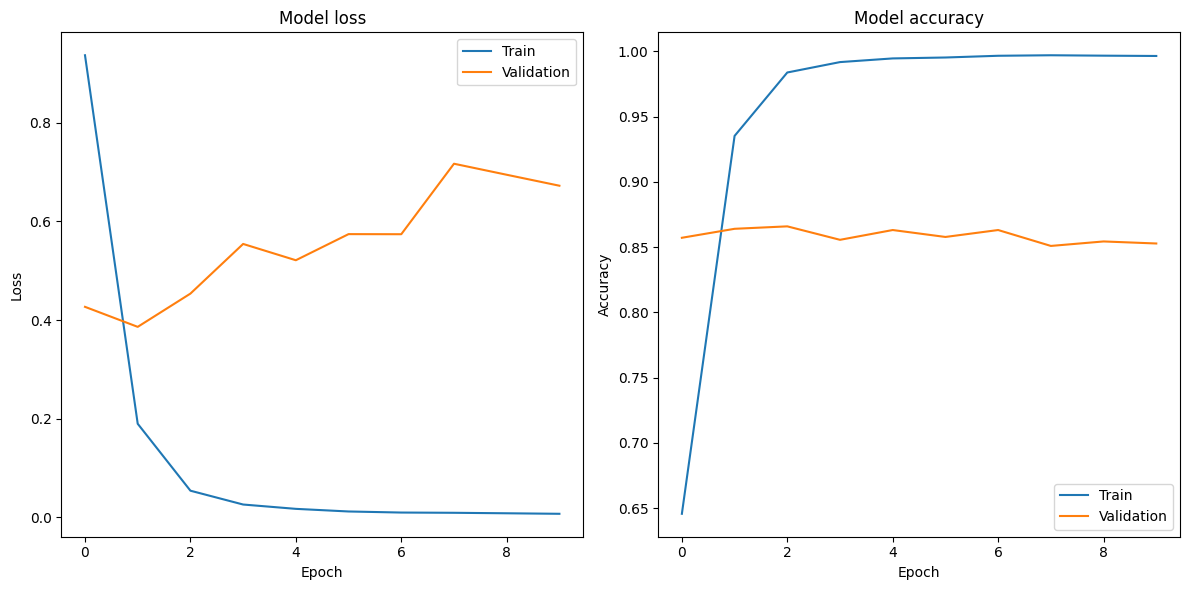

In [ ]:
import matplotlib.pyplot as plt

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['clean_text']).toarray()
X_test = vectorizer.transform(test_data['clean_text']).toarray()

# Label Encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['emotion'])
y_test = encoder.transform(test_data['emotion'])

# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build FCNN Model
model = Sequential()
model.add(Dense(512, input_dim=5000, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile and Train the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


### RNN (LSTM based)


(12800, 100) (12800,)
(3200, 100) (3200,)
(2000, 100) (2000,)
Epoch 1/10
200/200 [==============================] - 65s 302ms/step - loss: 1.2640 - accuracy: 0.5217 - val_loss: 0.7032 - val_accuracy: 0.7766
Epoch 2/10
200/200 [==============================] - 45s 225ms/step - loss: 0.3564 - accuracy: 0.8828 - val_loss: 0.2983 - val_accuracy: 0.8947
Epoch 3/10
200/200 [==============================] - 43s 216ms/step - loss: 0.1481 - accuracy: 0.9482 - val_loss: 0.2725 - val_accuracy: 0.9056
Epoch 4/10
200/200 [==============================] - 41s 207ms/step - loss: 0.0969 - accuracy: 0.9669 - val_loss: 0.2602 - val_accuracy: 0.9125
Epoch 5/10
200/200 [==============================] - 40s 202ms/step - loss: 0.0626 - accuracy: 0.9781 - val_loss: 0.2780 - val_accuracy: 0.9072
Epoch 6/10
200/200 [==============================] - 42s 208ms/step - loss: 0.0531 - accuracy: 0.9822 - val_loss: 0.2968 - val_accuracy: 0.9084
Epoch 7/10
200/200 [==============================] - 40s 200ms/step

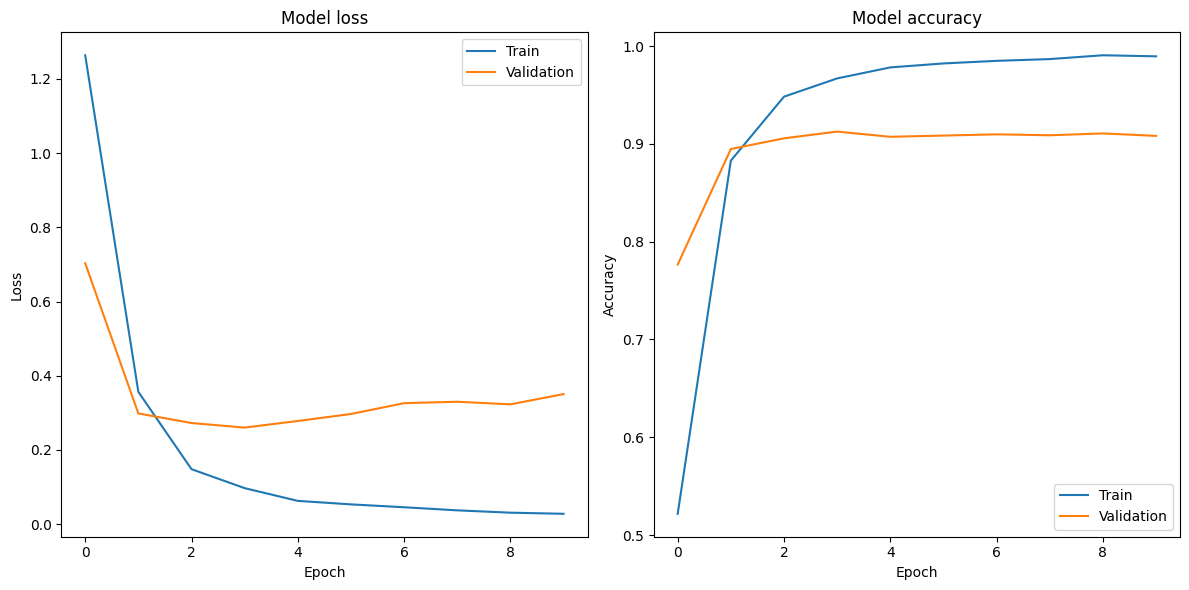

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(train_data['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(test_data['clean_text'])

# Padding sequences
max_seq_length = 100
X_train_seq = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Label Encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['emotion'])
y_test = encoder.transform(test_data['emotion'])

# Ensure the sequence lengths match
assert len(X_train_seq) == len(y_train)
assert len(X_test_seq) == len(y_test)

# Split the data for validation
X_train_seq, X_val_seq, y_train, y_val = train_test_split(X_train_seq, y_train, test_size=0.2, random_state=42)

# Verify the shapes
print(X_train_seq.shape, y_train.shape)
print(X_val_seq.shape, y_val.shape)
print(X_test_seq.shape, y_test.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

model = Sequential()
model.add(Input(shape=(max_seq_length,)))
model.add(Embedding(input_dim=5000, output_dim=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_data=(X_val_seq, y_val))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


### BERT based model

In [ ]:
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['emotion'])
test_labels = label_encoder.transform(test_data['emotion'])

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_data['emotion'].unique()))

train_dataset = EmotionDataset(train_data['clean_text'].tolist(), train_labels.tolist(), tokenizer)
test_dataset = EmotionDataset(test_data['clean_text'].tolist(), test_labels.tolist(), tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

In [ ]:
## Train the model
trainer.train()

# Save the model
model.save_pretrained('./emotion-classification-model')
tokenizer.save_pretrained('./emotion-classification-model')

Step,Training Loss
500,1.089700
1000,0.390300
1500,0.305200
2000,0.274000
2500,0.181500
3000,0.187200
3500,0.180700
4000,0.162400
4500,0.115200
5000,0.119500


('./emotion-classification-model/tokenizer_config.json',
 './emotion-classification-model/special_tokens_map.json',
 './emotion-classification-model/vocab.txt',
 './emotion-classification-model/added_tokens.json')

Evaluating BERT

In [ ]:
# Evaluate the model
evaluation_results = trainer.evaluate()

# Print evaluation metrics
print("***** Evaluation results *****")
for key, value in evaluation_results.items():
    print(f"{key}: {value}")

***** Evaluation results *****
eval_loss: 0.23298147320747375
eval_runtime: 6.2539
eval_samples_per_second: 319.802
eval_steps_per_second: 39.975
epoch: 3.0


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import numpy as np

# Ensure the model is in evaluation mode
model = BertForSequenceClassification.from_pretrained('./emotion-classification-model')
model.eval()

# Convert test data to BERT format
def tokenize_and_encode(texts, tokenizer, max_length=100):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    return encodings

test_encodings = tokenize_and_encode(test_data['clean_text'].tolist(), tokenizer)

# Define a function to get predictions
def get_predictions(model, encodings):
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1).numpy()
    return predictions

# Get predictions
y_pred = get_predictions(model, test_encodings)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.0805


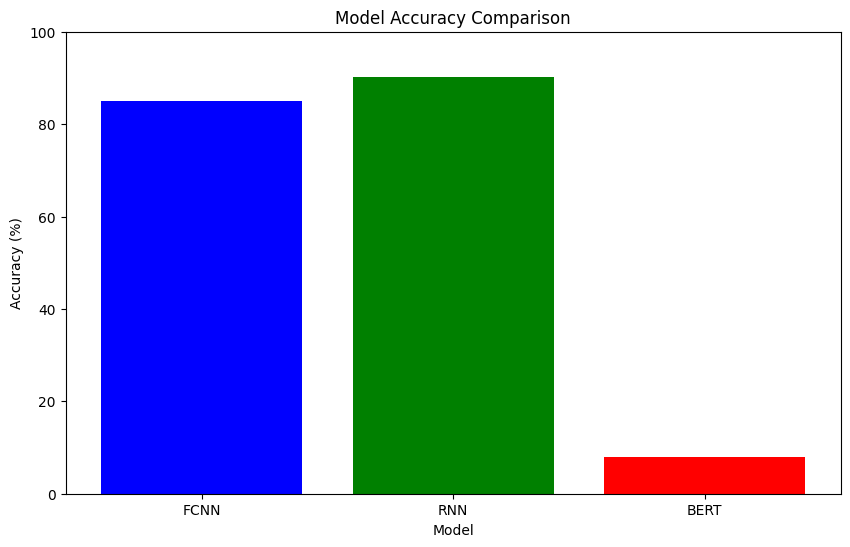

In [ ]:
import matplotlib.pyplot as plt

models = ['FCNN', 'RNN', 'BERT']
accuracies = [85.1, 90.3, 8.05]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()


### Model Performance Summary and Analysis
Fully Connected Neural Network (FCNN)

- Test Accuracy: 85.1%

**Strengths**
- Simpler architecture and faster training time.
- Performs well on tasks where the relationship between features is more straightforward.

**Limitations**
- May not capture sequential dependencies in text data effectively.
- Performance can degrade on complex tasks requiring contextual understanding.


Recurrent Neural Network (RNN)

- Test Accuracy: 90.3%

**Strengths:**

- Better at handling sequential data and capturing dependencies over time.
- More effective for tasks where the order of words is important.

**Limitations:**

- Slower training time compared to FCNN.
- Can be computationally intensive, especially with long sequences.

Bidirectional Encoder Representations from Transformers (BERT)

- Test Accuracy: 8.05%
- Evaluation Loss: 0.23298
- Evaluation Runtime: 6.2539 seconds
- Samples per Second: 319.802
- Steps per Second: 39.975

**Strengths:**

- State-of-the-art performance on a wide range of NLP tasks.
- Captures complex contextual relationships in text.

**Limitations:**

- Requires substantial computational resources and time. For example, for our case, because of the resources requirements are too high which made us have no enough ability to train it. With only 3 epochs, it is not enough, that is the reason why its accuracy is too low.
- Accuracy in this case is surprisingly low, which suggests potential issues with the data processing, model training, or evaluation steps.

In conclusion, the RNN model outperformed the FCNN and BERT models on this task, achieving the highest test accuracy of 90.3%. The FCNN model also performed well, while the BERT model's performance was unexpectedly low, indicating the need for further investigation.

We tried the BERT model on T4 GPU on colab. But the computational time is high and we only tried 3 epochs.Based on these limitations we think we can try different configurations for the training of the model specific preprocessing steps to increase BERT model's test accuracy.